# Pima Women Diabetes Prediction

## Importing and Examining the Data

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dr. Harrison\Desktop\DATA\PROJECTS\MeriSkill\Diabetes\Project 2 MeriSKILL\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

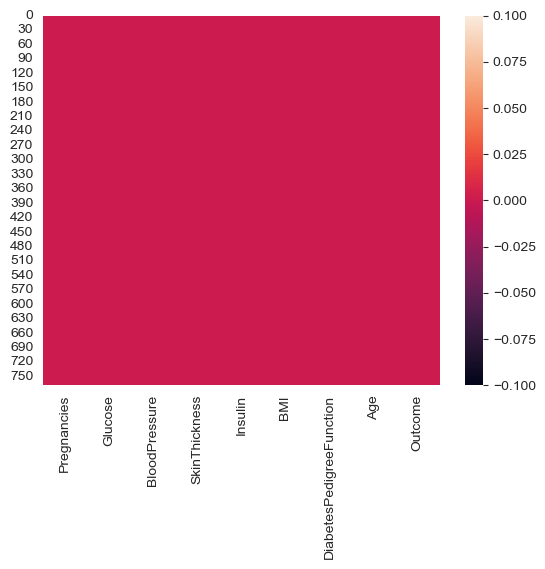

In [86]:
sns.heatmap(df.isnull())

<Axes: >

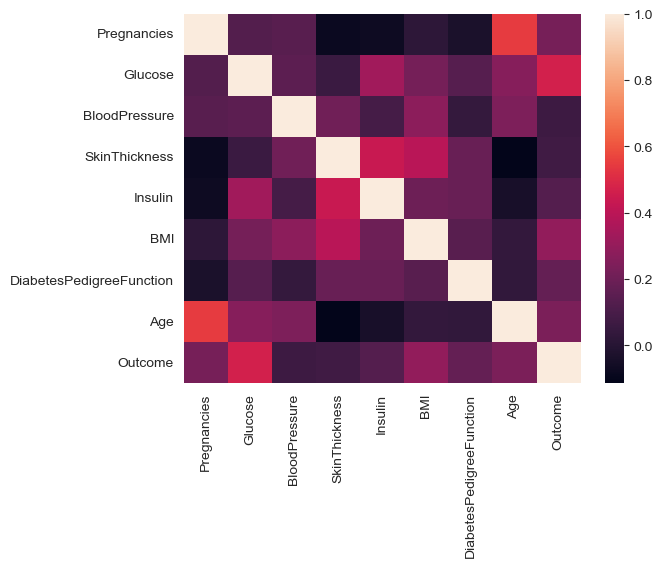

In [87]:
correlation = df.corr()
sns.heatmap(correlation)

Text(0.5, 1.0, 'Diabetes Status Proportion')

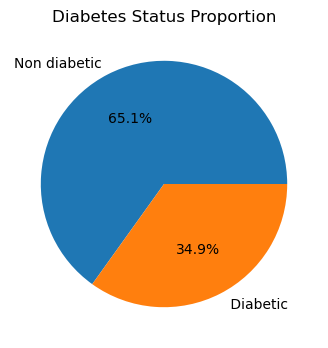

In [17]:
plt.figure(figsize=(6, 4))
plt.pie(df['Outcome'].value_counts(), labels = ['Non diabetic', ' Diabetic'], autopct = '%1.1f%%')
plt.title('Diabetes Status Proportion')

###### Majority of the women do not have diabetes with only approximately 35% having it.

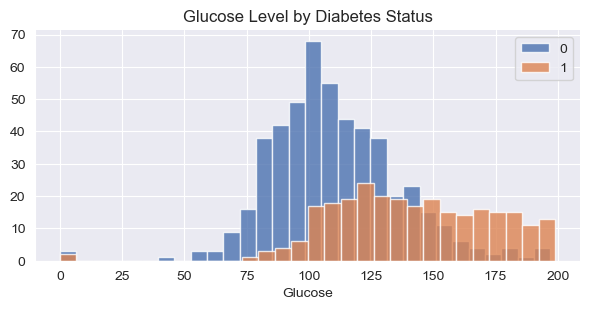

In [53]:
r = sns.FacetGrid(df, hue = 'Outcome', height = 3, aspect = 2, palette = 'deep')
r.map(plt.hist, 'Glucose', alpha= 0.8, bins =30)
r.set(title = 'Glucose Level by Diabetes Status')
plt.legend()

###### Most women with diabetes have glucose level within the range of 125-200 while those that don't have theirs within the range of 75-150.

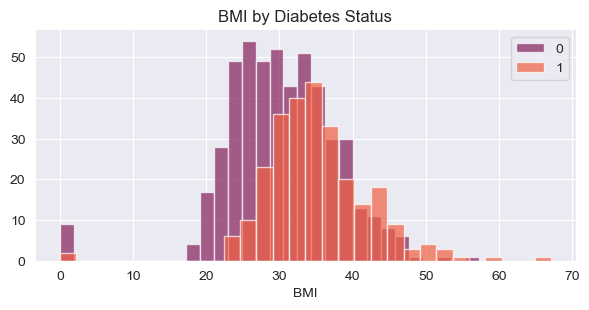

In [54]:
sns.set_style('darkgrid')
r = sns.FacetGrid(df, hue = 'Outcome', height = 3, aspect = 2, palette = 'rocket')
r.map(plt.hist, 'BMI', alpha= 0.7, bins =30)
r.set(title = 'BMI by Diabetes Status')
plt.legend()

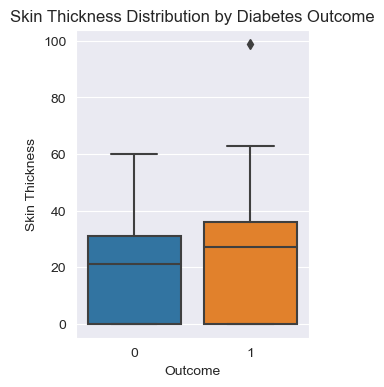

In [52]:
plt.figure(figsize=(3, 4))
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df)
plt.xlabel('Outcome')
plt.ylabel('Skin Thickness')
plt.title('Skin Thickness Distribution by Diabetes Outcome')
plt.show()

###### Skin thickness is lower in the women without diabetes, higher skin thickness can be an indicator of diabetes

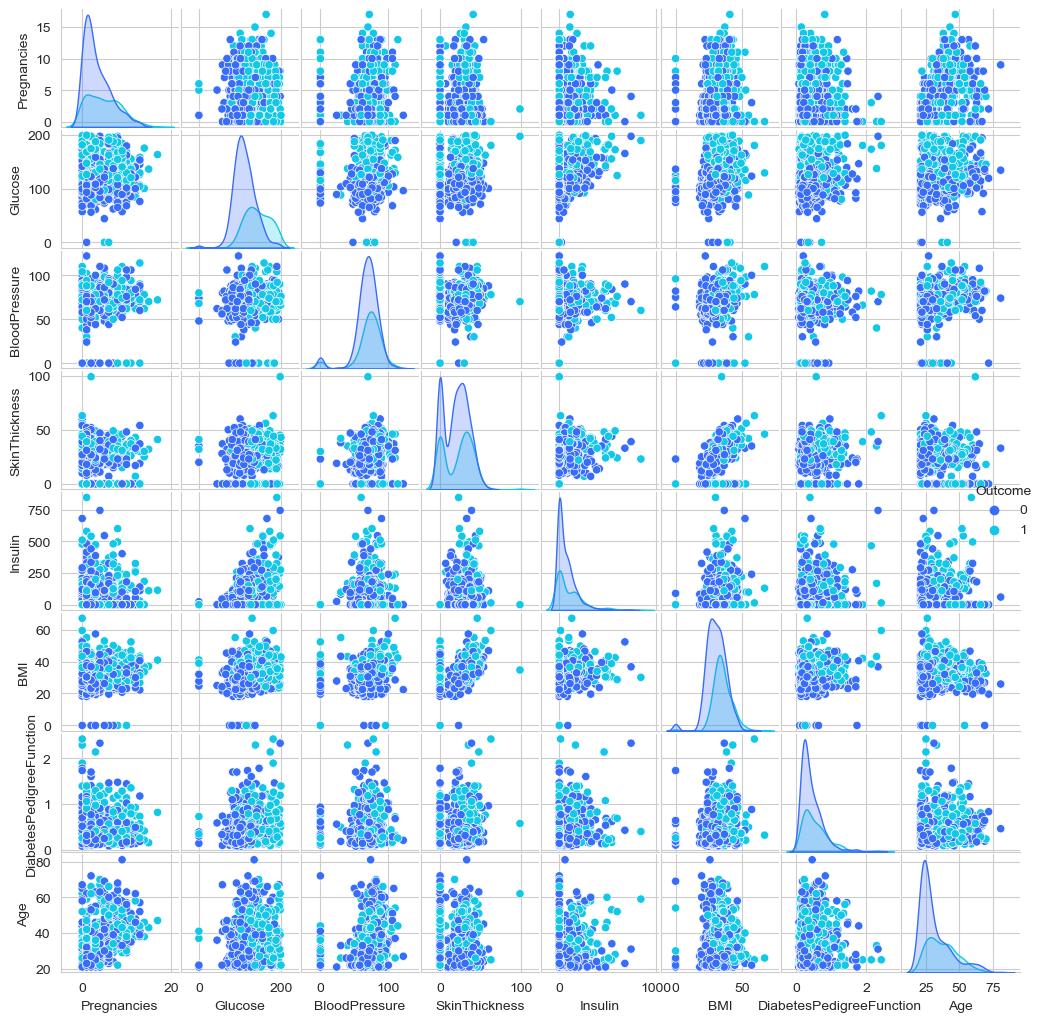

In [57]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
g = sns.pairplot(df, hue = 'Outcome', height = 4, aspect = 2)
g.fig.set_size_inches(10,10)

### Scaling the Data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [60]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

### Principal Componenet Analysis

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [63]:
t_pca = pca.transform(scaled_data)

In [65]:
df_comp = pd.DataFrame(pca.components_,columns = df.columns)

<Axes: >

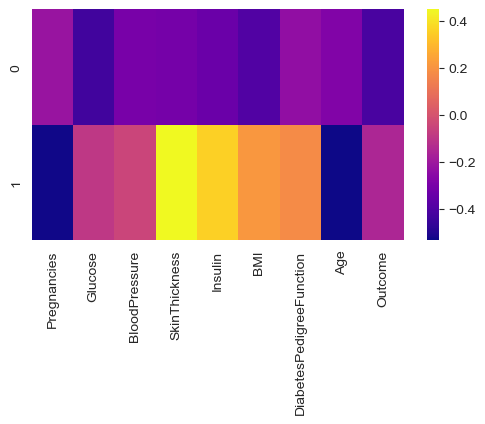

In [84]:
plt.figure(figsize=(6,3))
sns.heatmap(df_comp, cmap='plasma',)

## Building and Training the Model

### Importing required libraries

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

In [75]:
x = scaled_df.drop("Outcome", axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Train the Model

In [76]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### Making Predictions

In [79]:
prediction = model.predict(x_test)

### Model Evaluation

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(confusion_matrix(prediction, y_test))

[[83 21]
 [11 39]]


In [83]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       104
           1       0.65      0.78      0.71        50

    accuracy                           0.79       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.81      0.79      0.80       154

